This Notebook will be modified as long as I am progressing in Titanic prediction modeling Using Machine Learning Models.
**My working methodology is as following:**
1.  Loading necessary Libraries
2. Exploring the Data structure: Describe how the problem is represented
3. Search for features from the Raw Data 
4. Build Data prediction models using machine learning algorithms
5. Describe Results


# 1- Loading Libraries

In [4]:
# Loading Numpy and Pandas Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt




# 2. Exploring the Data structure: Describe how the problem is represented
## 2.1 Loading Data

In [46]:
import pandas as pd
## Creating panda dataframes from train and test CSV files
print("Loading Training and Testing Data =====>")
training_data = pd.read_csv('../input/train.csv')
testing_data = pd.read_csv('../input/test.csv')
print("<===== Training and Testing Data Loading finished")

## 2.1 Data Visualization
Here , we will first display the content in each dataframe. Using to_string() method is not a very good idea to see the data
Then we will analyse the Data by creating graphs 

### 2.1.1 Dataframes manipulations with Pandas
https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

In [5]:
'''
    Printing the 5 first samples in training_data dataframe 
'''
training_data.head(5)

In [ ]:
'''
    Printing the 6 samples select randomly in training_data dataframe 
'''
training_data.sample(6)

In [6]:
training_data.columns

In [7]:
training_data.dtypes

In [9]:

%matplotlib inline
'''
    Creating dataframes separating survived and not survived passergers
'''
td_not_survived=training_data.loc[(training_data['Survived']==0)]
td_survived=training_data.loc[(training_data['Survived']==1)]

In [11]:
td_not_survived.head(5)

In [14]:
td_survived.sample(10)

### 2.1.2 Plots

#### Plotting histogram of survived by Gender
The number of survived persons may depend on the Sex of the person. So it will be more accurate to see a plot describing whether there is so much difference if the gender is different

In [15]:

df = training_data.groupby(['Sex','Survived']).size()
df=df.unstack()
df.head()


In [16]:
plt.figure();df.plot(kind='bar').set_title('Gender histogram training data')

As shown in this plot. Approximately 3/4 of females we survived and Only 1/6 males were survived
Here are the results
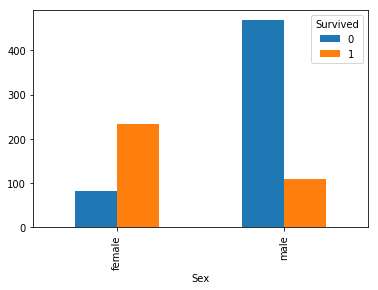


In [17]:
df = td_survived.groupby('Sex').size()
#df=df.unstack()
df.head()

In [18]:
plt.figure();df.plot(kind='bar').set_title('Survived passengers by gender');

In [19]:
df = td_not_survived.groupby('Sex').size()
plt.figure();df.plot(kind='bar').set_title(' Not Survived passengers by gender');

#### Plotting histogram of survived by Pclass

In [20]:
df = td_survived.groupby('Pclass').size()
plt.figure();df.plot(kind='bar').set_title('Survived passengers by Pclass');

In [21]:
df = td_not_survived.groupby('Pclass').size()
plt.figure();df.plot(kind='bar').set_title('Not Survived passengers by Pclass');

Most of not survived Passengers in Titanic were from 3rd Class. We need to check whether 1st and 2nd Class who didn't survive are from which category of age and which gender

#### Plotting histogram of survived by Age

In [22]:
plt.figure();
td_survived.Age.hist()


Now as you can see that age, p class, gender this are important factors for model fitting but we need to fit other parameters also as thest also have some contribution to the survival. I am using "dataset" variable now for training data set.

**Step 1: Data Preprocessing**

In [47]:
#Not taking cabin column as so much of missing data hence imputing based on mode can cause errors
#Titanic dataset from kaggle
dataset = training_data
dataset= dataset[['PassengerId','Name','Ticket','Cabin','Embarked','Sex','Pclass','Age','SibSp','Parch','Fare','Survived']]
X = dataset.iloc[:, 4:11].values #Name, PassengerId, Ticket and Cabin doesnot give any idea whether the passenger will survive or not
y = dataset.iloc[:, 11].values

In [48]:
#Imputing missing categorical and numeric variables respectively:
#Using mode for categorical variable along the column and mean for numeric variable along the column.
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, A, b=None):

        self.fill = pd.Series([A[c].value_counts().index[0]
            if A[c].dtype == np.dtype('O') else A[c].mean() for c in A],
            index=A.columns)

        return self

    def transform(self, A, b=None):
        return A.fillna(self.fill)

X = DataFrameImputer().fit_transform(pd.DataFrame(X))
#Above code is for imputing dataframe. Mode for categorical and mediun for numeric

X= X.values

**Step2: Encoding Categorical Data**

In [49]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 0] = labelencoder_X_2.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

**Step3: Splitting dataset into training and test set.**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Step4: Fitting XGboost to the dataset**

In [51]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

**Step5 : Predicting the Test set results(for checking model accuracy)**

In [53]:
y_pred = classifier.predict(X_test)
#Converting into dataframe
y_pred_df = pd.DataFrame(y_pred, columns= ['Survived'])
#Column name in the square bracket

**Step6: Making the confusion matrix and checking the model accuracy with K-fold cross validation**

In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Gives 84% accuracy from confusion matrix

#Applying K-fold cross validation for further check for model performance
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X= X_train, y= y_train, cv =10)
accuracies.mean()
accuracies.std()  # 83% accuracy from this method

**Accuracy of the model**

In [64]:
accuracies.mean()

**Predicting the actual given test_set**

In [62]:
# ===== ====== ======= ====== ======= ====== ====== ====== ====== ======
#Now predicting the survival of test_data(Actual)
dataset_test = testing_data

#Rearranging the columns for better understanding of dataset
dataset_test= dataset_test[['PassengerId','Name','Ticket','Cabin','Embarked','Sex','Pclass','Age','SibSp','Parch','Fare']]
X2 = dataset_test.iloc[:, 4:11].values

#Imputer categorical variables
X2 = DataFrameImputer().fit_transform(pd.DataFrame(X2))
#Above code is for imputing dataframe. Mode for categorical and mediun for numeric
X2= X2.values #Converting back to array format

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X2_1 = LabelEncoder()
X2[:, 1] = labelencoder_X_1.fit_transform(X2[:, 1])
labelencoder_X2_2 = LabelEncoder()
X2[:, 0] = labelencoder_X2_2.fit_transform(X2[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X2 = onehotencoder.fit_transform(X2).toarray()
X2 = X2[:, 1:]

#Prediction od test_data
y_pred_test = classifier.predict(X2)

#Converting into dataframe
d= {'PassengerId' : dataset_test.iloc[:, 0].values, 'Survived' : y_pred_test}
y_pred_test_df = pd.DataFrame(d)
#Column name in the square bracket




**Final prediction :**

In [63]:
y_pred_test_df